In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [5]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
titanic_df.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [7]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [8]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

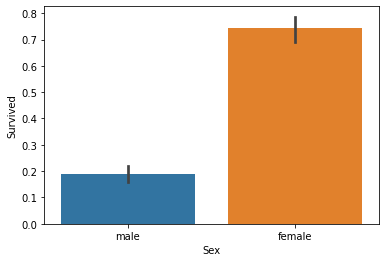

In [10]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

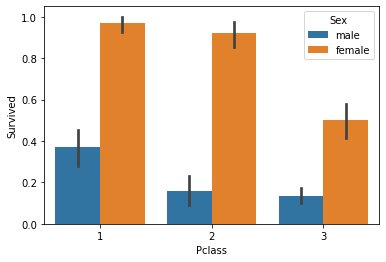

In [11]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data = titanic_df)

In [12]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager' 
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

<AxesSubplot:xlabel='Age', ylabel='Survived'>

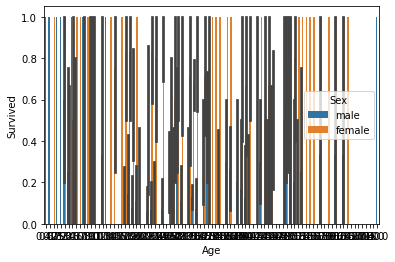

In [13]:
sns.barplot(x='Age',y='Survived',hue='Sex',data = titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

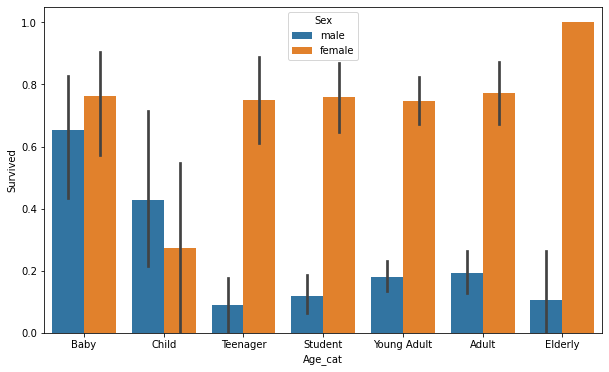

In [14]:
plt.figure(figsize=(10,6))
group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data = titanic_df,order=group_names)

In [15]:
def encode_features(dataDF):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        dataDF[feature] = LabelEncoder().fit_transform(dataDF[feature])
        return dataDF

In [16]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,Adult


In [17]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns = ['PassengerId','Name','Ticket'],inplace=True)
    return df


def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin','Sex','Embarked']
    df.Cabin = df.Cabin.str[:1]
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df


def transfrom_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [18]:
titanic_df = pd.read_csv('data/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transfrom_features(X_titanic_df)
X_titanic_df

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [ ]:
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

In [ ]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

In [ ]:
print('dt accuracy : ',accuracy_score(y_test,dt_pred))
print('rf accuracy : ',accuracy_score(y_test,rf_pred))
print('lr accuracy : ',accuracy_score(y_test,lr_pred))

In [ ]:
from sklearn.model_selection import KFold


In [ ]:
import warnings
wanrings.filterwarnings('ingnoer')

In [ ]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train,X_test   =  X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test   =  y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accruacy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')
    
              

In [ ]:
exec_kfold(dt_clf)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균 정확도 : {np.mean(scores):.4f}')


In [ ]:
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균 정확도 : {np.mean(scores):.4f}')


In [ ]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균 정확도 : {np.mean(scores):.4f}')


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
'max_depth':[2,3,5,10],    # 트리의 최대 깊이
    'min_samples_split':[2,3,5], # 나누기위한 최소 샘플의 개수
    'min_samples_leaf':[1,5,8]  # 

}

In [ ]:
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

In [ ]:
grid_dclf.cv_results_

In [ ]:
grid_dclf.best_params_

In [ ]:
best_dclf = grid_dclf.best_estimator_

In [ ]:
pred = best_dclf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,pred)

In [ ]:
accuracy